# **Climate & Energy Simulation Analytics**


In [1]:

!pip install --upgrade pip
!pip install prophet
!pip install plotly
!pip install dash
!pip install shap
!pip install tensorflow==2.12.0 scikit-learn pandas matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 67.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [dash]
ERROR: Could not find a version that satisfies the requirement tensorflow==2.12.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.12.0


In [2]:
# imports
import os, sys, json, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from prophet import Prophet
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import joblib
import shap
import warnings
warnings.filterwarnings('ignore')

In [3]:
# set display
pd.set_option('display.max_columns', 200)

# **IMPORT DATASETS**

In [4]:
# Load the dataset
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv')

# Display the first few rows
display(df.head())

# Display information about the dataframe
display(df.info(5))

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

None

In [5]:
import plotly.express as px

# Define relationships we want to explore:  (x-axis, y-axis, title)
plots = [
    ("Renewable energy share in the total final energy consumption (%)",
     "Value_co2_emissions_kt_by_country",
     "CO₂ Emissions vs Renewable Energy Share"),

    ("Access to electricity (% of population)",
     "Renewable energy share in the total final energy consumption (%)",
     "Access to Electricity vs Renewable Energy Share"),

    ("Access to electricity (% of population)",
     "Value_co2_emissions_kt_by_country",
     "Access to Electricity vs CO₂ Emissions"),
]

# Loop through each pair and create the scatter plot using Plotly Express
for x_col, y_col, title in plots:
    fig = px.scatter(df, x=x_col, y=y_col, title=title, hover_name="Entity", color="Year")
    fig.show()

In [7]:
# Check for missing values
display(df.isnull().sum())
df.shape

,0
Entity,0
Year,0
Access to electricity (% of population),10
Access to clean fuels for cooking,169
Renewable-electricity-generating-capacity-per-capita,931
Financial flows to developing countries (US $),2089
Renewable energy share in the total final energy consumption (%),194
Electricity from fossil fuels (TWh),21
Electricity from nuclear (TWh),126
Electricity from renewables (TWh),21


(3649, 21)

# **EDA**

In [8]:
# Basic EDA
import pandas as pd, numpy as np
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
year_min = df['Year'].min()
year_max = df['Year'].max()
total_years = df['Year'].nunique()
print(f"Year range: {year_min} to {year_max}")
print(f"Total unique years: {total_years}")


# missing values & types
print("\nMissing values (top):")
print(df.isnull().sum().sort_values(ascending=False).head(30))

# show sample Entity values
print("\nTop Entities:")
print(df['Entity'].value_counts().head(20))

Shape: (3649, 21)
Columns: ['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']
Year range: 2000 to 2020
Total unique years: 21

Missing values (top):
Renewables (% equivalent primary energy)                            2137
Financial flows to developing countries (US $)                      2089
Renewable-electricity-generating-capa

In [9]:
# numeric summary
numeric = df.select_dtypes(include=[np.number]).columns.tolist()
display(df[numeric].describe().transpose().head(40))

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


# **Select target & prepare time-series per country**

In [10]:
# Choose targets: example 'Renewable energy share in the total final energy consumption (%)'
TARGET = 'Renewable energy share in the total final energy consumption (%)'
ENTITY_COL = 'Entity'
YEAR_COL = 'Year'

# Quick pivot for a chosen entity (example: India)
entity_name = 'India'  # change to the country you want to model
ts = df[df[ENTITY_COL]==entity_name].sort_values(YEAR_COL)[[YEAR_COL, TARGET]].dropna()
ts = ts.rename(columns={YEAR_COL: 'ds', TARGET: 'y'})  # Prophet format
ts['ds'] = pd.to_datetime(ts['ds'].astype(str) + '-01-01')  # make dates for Prophet
ts


,ds,y
1534,2000-01-01,46.88
1535,2001-01-01,47.11
1536,2002-01-01,45.75
1537,2003-01-01,45.63
1538,2004-01-01,44.92
1539,2005-01-01,44.16
1540,2006-01-01,43.16
1541,2007-01-01,41.53
1542,2008-01-01,39.37
1543,2009-01-01,37.41


# **Prophet forecast (annual forecasting)**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7sxcc8o6/pr4rc7sk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7sxcc8o6/7yy7_3ow.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61498', 'data', 'file=/tmp/tmp7sxcc8o6/pr4rc7sk.json', 'init=/tmp/tmp7sxcc8o6/7yy7_3ow.json', 'output', 'file=/tmp/tmp7sxcc8o6/prophet_model83rwou63/prophet_model-20250920145236.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:52:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
15,2015-01-01,33.442230,33.030031,33.853848
16,2016-01-01,33.201301,32.762111,33.608133
17,2017-01-01,32.959713,32.531003,33.397858
18,2018-01-01,32.718784,32.306802,33.132455
19,2019-01-01,32.477855,32.030882,32.883967
20,2019-12-31,32.237586,31.801383,32.656098
21,2020-12-31,31.995997,31.447020,32.515619
22,2021-12-31,31.755068,30.937755,32.534351
23,2022-12-31,31.514139,30.365553,32.580343
24,2023-12-31,31.273210,29.726832,32.655547


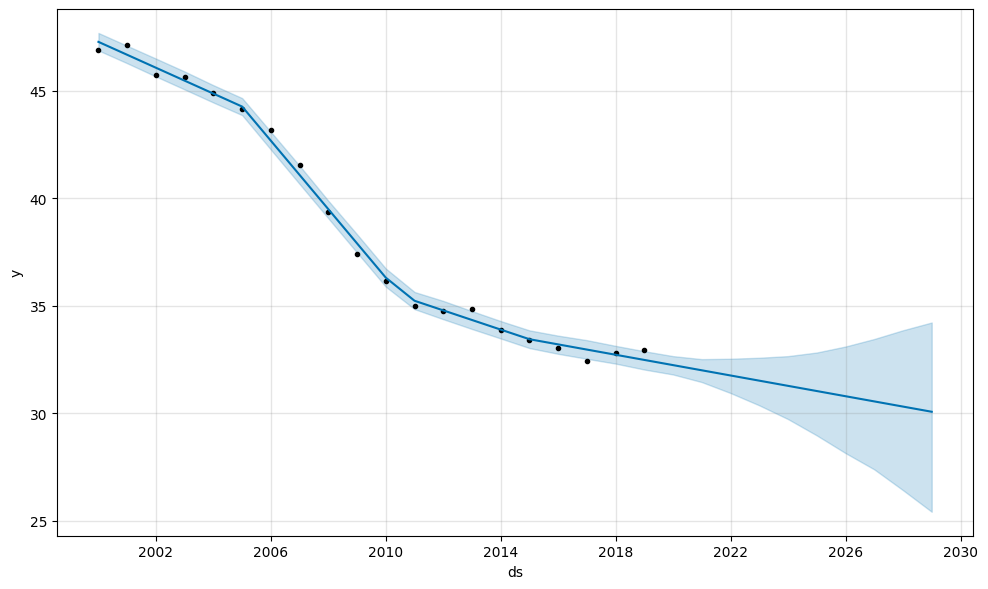

In [11]:
from prophet import Prophet
m = Prophet(yearly_seasonality=False, daily_seasonality=False)
m.fit(ts)   # ts is the country timeseries (ds,y)

future = m.make_future_dataframe(periods=10, freq='Y')  # forecast next 10 years (annual)
forecast = m.predict(future)
display(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(15))

# Plot (Prophet built-in)
fig = m.plot(forecast)


## LSTM Model for Time-Series Forecasting (Multi-Country)

We will train an LSTM model across multiple countries for the same target variable. This approach helps to leverage more data points, especially with limited yearly data per country.

In [12]:
# Build LSTM across multiple entities
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Prepare sequences from multiple countries: for each (entity) create sliding windows
def build_sequences_for_entity(df_ent, seq_len=5, target_col='y'):
    arr = df_ent[target_col].values
    X, y = [], []
    for i in range(len(arr)-seq_len):
        X.append(arr[i:i+seq_len])
        y.append(arr[i+seq_len])
    return np.array(X), np.array(y)

# Build dataset across many countries
entities = df['Entity'].unique().tolist()
seq_len = 5
X_all, y_all = [], []
for ent in entities:
    sub = df[df[ENTITY_COL]==ent].sort_values(YEAR_COL)[[YEAR_COL, TARGET]].dropna()
    if len(sub) >= seq_len + 1:
        sub = sub.rename(columns={YEAR_COL:'ds', TARGET:'y'})
        X,y = build_sequences_for_entity(sub, seq_len=seq_len, target_col='y')
        if len(X):
            X_all.append(X)
            y_all.append(y)
if not X_all:
    raise ValueError("No entities with enough rows for sequence modeling.")
X_all = np.vstack(X_all)
y_all = np.concatenate(y_all)

# scale
scaler = StandardScaler()
X_flat = scaler.fit_transform(X_all.reshape(-1, X_all.shape[-1])).reshape(X_all.shape)
y_mean = y_all.mean(); y_std = y_all.std()
y_all_scaled = (y_all - y_mean) / (y_std + 1e-9)

# reshape for LSTM: (samples, time_steps, features) — features = 1 (univariate)
X_lstm = X_flat.reshape((X_flat.shape[0], X_flat.shape[1], 1))

# model
model = Sequential([
    LSTM(64, input_shape=(seq_len,1), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_lstm, y_all_scaled, validation_split=0.15, epochs=200, batch_size=16, callbacks=[es], verbose=2)

# example prediction backtransform
pred_scaled = model.predict(X_lstm[:10]).flatten()
pred = pred_scaled * (y_std + 1e-9) + y_mean
print("Sample prediction:", pred[:5])


Epoch 1/200
138/138 - 6s - 43ms/step - loss: 0.0908 - mae: 0.1872 - val_loss: 0.0140 - val_mae: 0.0803
Epoch 2/200
138/138 - 1s - 8ms/step - loss: 0.0172 - mae: 0.0989 - val_loss: 0.0130 - val_mae: 0.0792
Epoch 3/200
138/138 - 1s - 10ms/step - loss: 0.0163 - mae: 0.0953 - val_loss: 0.0117 - val_mae: 0.0716
Epoch 4/200
138/138 - 1s - 7ms/step - loss: 0.0149 - mae: 0.0912 - val_loss: 0.0119 - val_mae: 0.0709
Epoch 5/200
138/138 - 1s - 11ms/step - loss: 0.0133 - mae: 0.0845 - val_loss: 0.0101 - val_mae: 0.0633
Epoch 6/200
138/138 - 1s - 9ms/step - loss: 0.0118 - mae: 0.0791 - val_loss: 0.0110 - val_mae: 0.0773
Epoch 7/200
138/138 - 1s - 7ms/step - loss: 0.0115 - mae: 0.0774 - val_loss: 0.0130 - val_mae: 0.0815
Epoch 8/200
138/138 - 1s - 6ms/step - loss: 0.0109 - mae: 0.0761 - val_loss: 0.0086 - val_mae: 0.0597
Epoch 9/200
138/138 - 1s - 9ms/step - loss: 0.0107 - mae: 0.0747 - val_loss: 0.0085 - val_mae: 0.0630
Epoch 10/200
138/138 - 1s - 6ms/step - loss: 0.0099 - mae: 0.0711 - val_loss: 0

# Monte Carlo simulation for energy mix scenarios

**This demonstrates how you simulate many futures for energy mix and compute distribution of renewable share in 2030.**

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Build base growth rates from last 5-year trend (example, global aggregate)
agg = df.groupby('Year').sum().reset_index()
# pick the columns you want to treat as sources (you may need to map your exact column names)
sources = [c for c in agg.columns if any(s in c.lower() for s in ['coal','gas','oil','renew','hydro','wind','solar','nuclear'])]
print("Sources detected:", sources)

# If no source columns automatically detected, explicitly set:
if not sources:
    sources = ['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)']  # adapt to your names

base = agg[agg['Year']>=2015][sources].mean()  # base recent average
# define mean annual growth rates per source (example)
growth_means = {s: 0.02 for s in sources}  # 2% default
growth_stds = {s: 0.03 for s in sources}

def simulate_mix(years=10, n_sims=2000):
    results = []
    for sim in range(n_sims):
        vals = base.copy()
        for y in range(years):
            for s in sources:
                r = np.random.normal(growth_means[s], growth_stds[s])
                vals[s] = vals[s] * (1 + r)
        total = vals.sum()
        renew = sum(vals[s] for s in sources if 'renew' in s.lower() or 'solar' in s.lower() or 'wind' in s.lower() or 'hydro' in s.lower())
        results.append({'renewable_share': (renew/total)*100, 'total_energy': total})
    return pd.DataFrame(results)

sim_df = simulate_mix(years=10, n_sims=2000)
display(sim_df['renewable_share'].describe())



Sources detected: ['Renewable-electricity-generating-capacity-per-capita', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Renewables (% equivalent primary energy)']


,renewable_share
count,2000.000000
mean,93.299734
std,0.702286
min,90.761029
25%,92.855083
50%,93.356523
75%,93.801244
max,95.624904


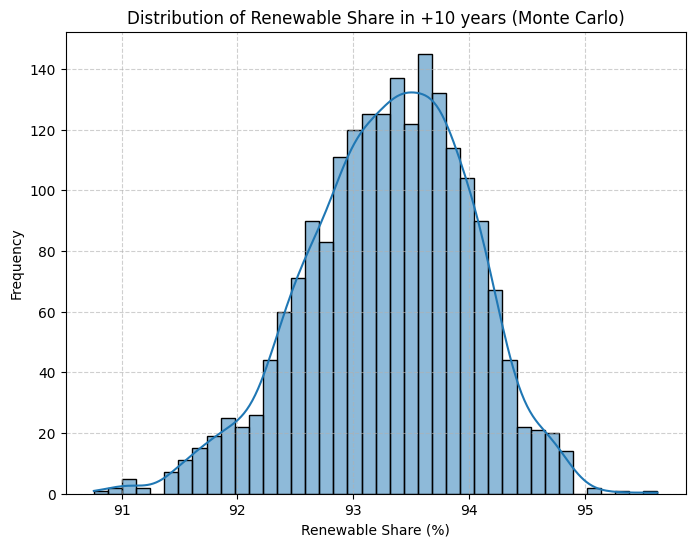

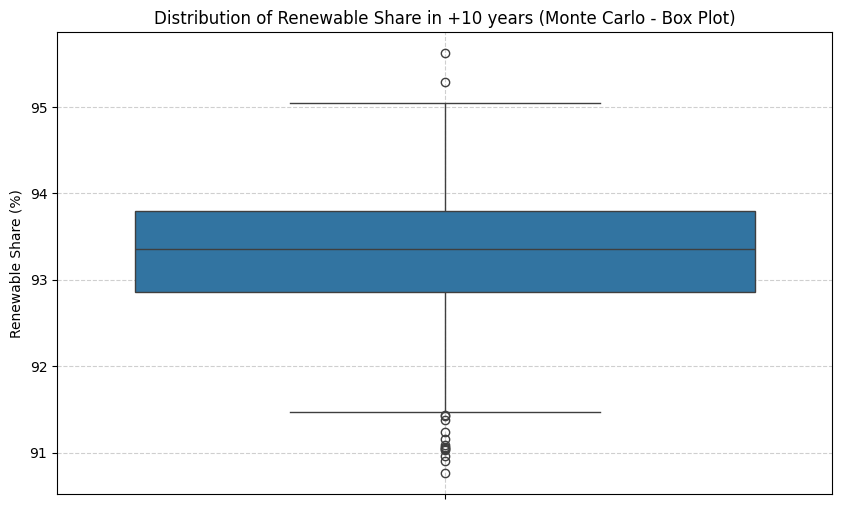

In [14]:
# Histogram of simulated renewable share using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(sim_df, x='renewable_share', bins=40, kde=True) # Add KDE for a smoother view of the distribution
plt.title('Distribution of Renewable Share in +10 years (Monte Carlo)')
plt.xlabel('Renewable Share (%)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Box plot of simulated renewable share using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(y=sim_df['renewable_share'])
plt.title('Distribution of Renewable Share in +10 years (Monte Carlo - Box Plot)')
plt.ylabel('Renewable Share (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [17]:
# Save Plotly figures as HTML files so they can be viewed outside of Colab

# Assuming the Plotly figures are stored in a list called 'plots' from cell 21c1e051
# And the last figure created by Prophet is named 'fig' from cell CF7QlBepdYLA

# Save the scatter plots
for i, (x_col, y_col, title) in enumerate(plots):
    fig = px.scatter(df, x=x_col, y=y_col, title=title, hover_name="Entity", color="Year")
    fig.write_html(f"{title.replace(' ', '_').replace(':', '')}_scatter_plot.html")
    print(f"Saved {title}_scatter_plot.html")

# Save the Prophet forecast plot
if 'fig' in locals():
    fig.write_html("prophet_forecast_plot.html")
    print("Saved prophet_forecast_plot.html")
else:
    print("Prophet forecast figure 'fig' not found.")

# Note: The Seaborn plots (histogram and box plot) are static images and should appear in the downloaded notebook.

Saved CO₂ Emissions vs Renewable Energy Share_scatter_plot.html
Saved Access to Electricity vs Renewable Energy Share_scatter_plot.html
Saved Access to Electricity vs CO₂ Emissions_scatter_plot.html
Saved prophet_forecast_plot.html


# **Plotly visualization of forecast + Monte Carlo on one plot**

In [15]:
# Prophet forecast for the entity we fitted earlier:
# Use forecast computed earlier (forecast DataFrame). We'll plot y + yhat and simulation distribution.

import plotly.graph_objects as go

# sample actual series for chosen entity (ts)
actual_dates = ts['ds']
actual_y = ts['y']

# take prophet forecast (ensure `forecast` variable from prophet step)
# Plot actual + predicted interval
fig = go.Figure()
fig.add_trace(go.Scatter(x=actual_dates, y=actual_y, mode='markers+lines', name='actual'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='prophet_forecast'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', name='upper', opacity=0.3))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', name='lower', opacity=0.3))
fig.update_layout(title='Actual vs Prophet forecast')
fig.show()


In [16]:
import joblib

# Save the trained Prophet model
# Assuming the Prophet model object is named 'm' from cell CF7QlBepdYLA
if 'm' in locals():
    joblib.dump(m, 'prophet_model.pkl')
    print("Prophet model saved as 'prophet_model.pkl'")
else:
    print("Prophet model 'm' not found. Please run the Prophet training cell first.")

# Save the trained Keras LSTM model
# Assuming the LSTM model object is named 'model' from cell bYNrBxCFv4zX
if 'model' in locals():
    model.save('lstm_model.h5')
    print("LSTM model saved as 'lstm_model.h5'")
else:
     print("LSTM model 'model' not found. Please run the LSTM training cell first.")

# Note: You will also need to save the scalers if you want to make new predictions
# using the saved models on new data.
if 'scaler' in locals():
     joblib.dump(scaler, 'lstm_scaler.pkl')
     print("LSTM scaler saved as 'lstm_scaler.pkl'")

if 'y_mean' in locals() and 'y_std' in locals():
    import pickle
    with open('lstm_ystd_ymean.pkl', 'wb') as f:
        pickle.dump({'y_mean': y_mean, 'y_std': y_std}, f)
    print("LSTM y_mean and y_std saved as 'lstm_ystd_ymean.pkl'")

Prophet model saved as 'prophet_model.pkl'
LSTM model saved as 'lstm_model.h5'
LSTM scaler saved as 'lstm_scaler.pkl'
LSTM y_mean and y_std saved as 'lstm_ystd_ymean.pkl'
